In [1]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from itertools import *
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
%matplotlib inline

In [2]:
import datetime
import logging
import itertools
import numpy as np
import gensim
from gensim import corpora, models, similarities
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamodel import LdaModel


In [38]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [3]:
# logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
# logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore


In [85]:
data = pd.read_csv('data/hilary_scores.csv')
data[pd.isnull(data['Comment'])] = ""

In [86]:
def unix_convert(x):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

In [87]:
data['month'] = data['date'].apply(lambda x: unix_convert(x))
data['month'].unique()
month_list = data2['month'].unique()
month_list

array(['2015-09', '2015-08', '2015-07'], dtype=object)

In [88]:
def to_filter(text):
    terms = ['Hillary', 'Clinton']
    if any(word in text for word in terms):
        return text
    else:
        return None 

In [89]:
data['Comment_fil'] = data['Comment'].apply(lambda x : to_filter(x))
data['Comment_b'] = pd.notnull(data['Comment_fil'])
data2 = data[data['Comment_b']]
print len(data2)
data.columns

7750


Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Comment', u'URL', u'Recommendations',
       u'Locations', u'EditorPick', u'userID', u'date', u'Sentiment', u'State',
       u'City', u'latitude', u'longitude', u'month', u'Comment_fil',
       u'Comment_b'],
      dtype='object')

In [90]:
text_count = []
for i in month_list:
    print i
    text_count.append(data2.ix[data2['month'] ==i]['Comment'])

2015-09
2015-08
2015-07


In [91]:
def nested_sum(text_list) :
    total = []
    if len(text_list) == 1:
        for l in text_list:
            total.append(l)
    else:
        total2 = []
        for l in text_list:
            #print "list N!"
            for item in l:
                #print 'adding'
                total2.append(item)
        total.append(total2)
    
    return total

In [12]:
content = nested_sum(text_count[:2])[0]

In [13]:
stoplist = set('for a of the and to in'.split())
texts = [[word for word in comment.lower().split() if word not in stoplist]
        for comment in content]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
          for text in texts]

In [14]:
dictionary = corpora.Dictionary(texts)

In [15]:
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)

In [16]:
corpus_tfidf = tfidf[corpus]

In [18]:
model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=5)
model.print_topics(5)

[u"0.003*is + 0.003*this + 0.003*what + 0.003*he's + 0.003*sanders! + 0.003*be + 0.003*should + 0.003*bernie + 0.003*on + 0.003*i",
 u"0.004*president + 0.003*has + 0.003*sanders + 0.003*up + 0.003*bernie + 0.002*i + 0.002*you + 0.002*was + 0.002*don't + 0.002*it",
 u'0.003*thank + 0.003*you + 0.003*senator + 0.003*i + 0.003*he + 0.003*bernie! + 0.003*stand + 0.003*more + 0.003*you, + 0.003*2012.',
 u'0.004*go + 0.004*as + 0.004*my + 0.004*go! + 0.003*bernie! + 0.003*are + 0.003*is + 0.003*his + 0.003*i + 0.003*he',
 u"0.003*- + 0.003*we + 0.003*has + 0.003*is + 0.003*give + 0.003*'em + 0.002*looking + 0.002*bernie + 0.002*that + 0.002*sanders"]

### NMF

In [92]:
topics = []

for i in range(len(text_count)):
    keyterms = []
    print i
    vectorizer = TfidfVectorizer(stop_words='english')
    content = nested_sum(text_count[:i+1])[0]
    V = vectorizer.fit_transform(item for item in content).toarray() 
    features = vectorizer.get_feature_names()
    nmf = NMF(n_components=5).fit(V)
    #i+1
    for topic_idx, topic in enumerate(nmf.components_, 1):
        keyterms.append(" ".join([features[i]
                        for i in topic.argsort()[:-10 -1:-1]]))
    print keyterms
    
topics.append(keyterms)  

0
[u'sanders times bernie coverage clinton', u'biden joe run hillary bernie', u'hillary clinton republican trump like']
1
[u'sanders bernie times coverage hillary', u'biden joe run president hillary', u'clinton hillary people republican just']
2
[u'biden joe run president hillary', u'sanders bernie times clinton coverage', u'hillary clinton people republican trump']


In [28]:
yr_counts = pd.DataFrame(data2['year'].value_counts()).reset_index()

In [46]:
yr_counts.columns = ['year', 'count']
yr_counts.sort('year', inplace=True)

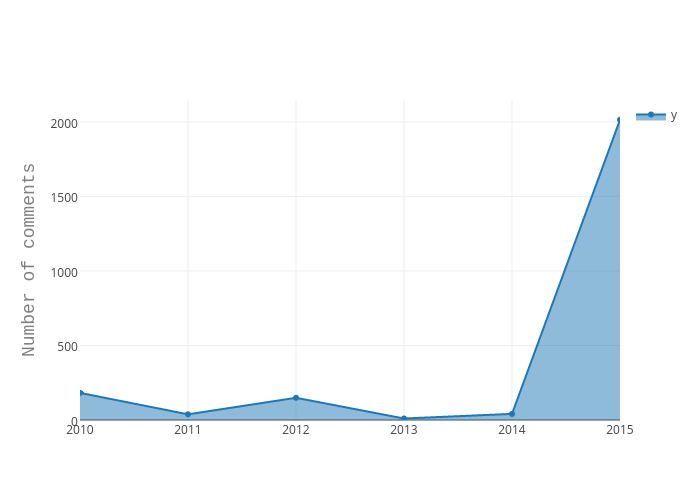

In [47]:
trace1 = Scatter(
        x=yr_counts['year'],
        y=yr_counts['count'],
        fill='tozeroy'
)

data = Data([trace1])

layout = Layout(
    showlegend=True,
    xaxis=XAxis(
        type='year',
    ),
    yaxis=YAxis(
        title='Number of comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
    )
    ))
    
fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='sanders_time')

In [50]:
data.columns

AttributeError: 'Data' object has no attribute 'columns'